In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# will create a data having some multicollinearity


x=np.random.normal(200,10,500)
x.mean()

199.53535248468583

In [3]:
x.std()

10.23715560024883

In [4]:
len(x)

500

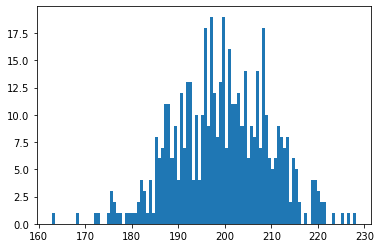

In [7]:
# we created a data having mean=200,std=10,no.of samples are 50
plt.hist(x,bins=100)
plt.show()

In [8]:
# create a data y , should be correlate to x
y=0.5*x+np.random.normal(10,5,500)
print("Mean",y.mean())
print("STD",y.std())

Mean 109.48300996497791
STD 6.935571692780724


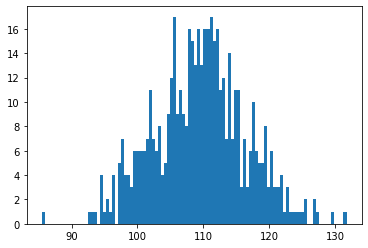

In [9]:
plt.hist(y,bins=100)
plt.show()

In [10]:
z=np.vstack([x,y]).T
z

array([[200.34815677, 107.89854299],
       [203.24419942, 113.72354504],
       [205.47790151, 122.08758325],
       [208.35533643, 114.31415144],
       [188.1378484 ,  99.63104819],
       [204.14583638, 111.70545985],
       [208.69252743, 119.16501688],
       [215.02400344, 121.05665774],
       [207.64129355, 117.61656946],
       [211.4071962 , 112.48632166],
       [187.0615551 , 106.08433267],
       [189.75870244, 107.8580705 ],
       [194.33259713, 107.88793748],
       [204.65813496, 111.89947403],
       [187.53849489, 105.62649293],
       [206.39267224, 110.10039964],
       [182.42198112,  94.53606544],
       [203.07537034, 109.21881375],
       [204.96620039, 109.35105494],
       [191.36929215, 101.63001082],
       [186.68207381,  99.85104465],
       [190.40392981, 109.4285827 ],
       [208.12976395, 112.57125853],
       [211.28132146, 114.4089175 ],
       [219.34222897, 126.85335584],
       [206.62356695, 112.79368053],
       [184.34168252, 101.74741669],
 

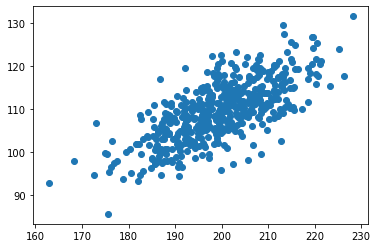

In [11]:
plt.scatter(z[:,0],z[:,1])
plt.show()

**observation**
- Both points are correalted each other 
- Both points are not orthogonal to each other 
- Perform covariance matrix for better idea

In [12]:
cov_mat=np.cov(z,rowvar=False)
cov_mat

array([[105.00937353,  50.6569139 ],
       [ 50.6569139 ,  48.19855181]])

**PCA**
- to reduce the dimensions
- to avoid multi collinearity
- to make data has orthogonal

- Need to find eigen values and eigen vectors
- Eigen values will decide how many Pc's we need to consider
- eigen vector will generate new data




|COV_mat-lambda*l|=0

In [14]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [15]:
eig_values

array([134.68141348,  18.52651186])

In [16]:
eig_vectors

array([[ 0.86287176, -0.50542292],
       [ 0.50542292,  0.86287176]])

**Quick checks**

- cov_mat*eig_vectors=eig_values*eig_vectors
- (eig_vectors.T)*eig_vectors=1
- A.T*A=1


In [18]:
cov_mat*eig_vectors[0]

array([[ 90.60962286, -25.6031653 ],
       [ 43.71042041, -24.36065276]])

In [19]:
eig_values[0]*eig_vectors[0]

array([116.21278817, -68.07107317])

In [20]:
eig_values/sum(eig_values)

array([0.87907602, 0.12092398])

In [ ]:
#PC1=0.87
#PC2=0.12
#so we can go for PC1

In [27]:
new_data=np.dot(z,eig_vectors)
pd.DataFrame(new_data,columns=['pc1','pc2'])


,pc1,pc2
0,227.409163,-8.157945
1,232.852166,-4.595441
2,239.006941,1.492687
3,237.560928,-6.669109
4,212.694651,-9.120363
...,...,...
495,219.831713,-7.393523
496,233.710079,-3.541913
497,215.690763,-7.018383
498,246.601908,-6.015268


In [28]:
old_data=pd.DataFrame(z,columns=['X','Y'])

In [29]:
plt.scatter(new_data['pc1'],new_data['pc2'])
plt.scatter(old_data['X'],old_data['Y']

SyntaxError: unexpected EOF while parsing (568032238.py, line 2)

# using PCA Package

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [31]:
pca.transform(z)

array([[ 9.94800589e-02,  1.77800173e+00],
       [-5.34352290e+00, -1.78450172e+00],
       [-1.14982980e+01, -7.87262985e+00],
       [-1.00522847e+01,  2.89166496e-01],
       [ 1.48139917e+01,  2.74041980e+00],
       [-5.10153346e+00,  4.12554982e-01],
       [-1.27949759e+01, -3.72608424e+00],
       [-1.92143063e+01, -2.15825463e+00],
       [-1.11052750e+01, -2.92129040e+00],
       [-1.17618212e+01,  3.40882906e+00],
       [ 1.24810569e+01, -3.37192043e+00],
       [ 9.25727687e+00, -3.53922863e+00],
       [ 5.29549686e+00, -1.25324880e+00],
       [-5.64164064e+00,  5.04073076e-01],
       [ 1.23009217e+01, -2.73580714e+00],
       [-6.22903045e+00,  2.93311845e+00],
       [ 2.23211732e+01,  4.24780620e+00],
       [-2.92105061e+00,  2.01717361e+00],
       [-4.61943219e+00,  2.85873527e+00],
       [ 1.10153486e+01,  2.64881714e+00],
       [ 1.59589472e+01,  1.81480922e+00],
       [ 7.90675553e+00, -4.56826656e+00],
       [-8.97674655e+00,  1.67905006e+00],
       [-1.